# Лабораторная работа № 2. 

Выполнил: Кайдалова Александра Андреевна, М8О-312Б-22

In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загрузка и анализ данных.

In [438]:
train_data = pd.read_csv('train.csv')

In [439]:
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2209155,2,2016-05-03 09:03:08,2016-05-03 09:17:12,2,-73.979813,40.752529,-73.982681,40.763680,N,844
1,id0586605,1,2016-01-01 16:40:51,2016-01-01 16:57:32,1,-73.977623,40.746296,-73.968414,40.788933,N,1001
2,id0467144,1,2016-04-24 13:57:03,2016-04-24 14:14:31,1,-73.950699,40.779404,-73.863129,40.768608,N,1048
3,id0989010,2,2016-01-10 17:03:47,2016-01-10 17:16:51,1,-73.984558,40.721802,-73.976753,40.752213,N,784
4,id0580742,1,2016-02-25 17:37:36,2016-02-25 17:49:48,1,-73.967720,40.768742,-73.977173,40.789875,N,732


In [440]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021050 entries, 0 to 1021049
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1021050 non-null  object 
 1   vendor_id           1021050 non-null  int64  
 2   pickup_datetime     1021050 non-null  object 
 3   dropoff_datetime    1021050 non-null  object 
 4   passenger_count     1021050 non-null  int64  
 5   pickup_longitude    1021050 non-null  float64
 6   pickup_latitude     1021050 non-null  float64
 7   dropoff_longitude   1021050 non-null  float64
 8   dropoff_latitude    1021050 non-null  float64
 9   store_and_fwd_flag  1021050 non-null  object 
 10  trip_duration       1021050 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 85.7+ MB


Из выведенной информации видно, что **значений NAN в данных нет**. (Так как столбец Non-Null Count отвечает за количество непустых значений в каждом столбце, а RangeIndex показывает общее количество записей).

### 2. Работа с выбросами.

Посмотрим, есть ли выбросы в длительности поездок с помощью ящика с усами:

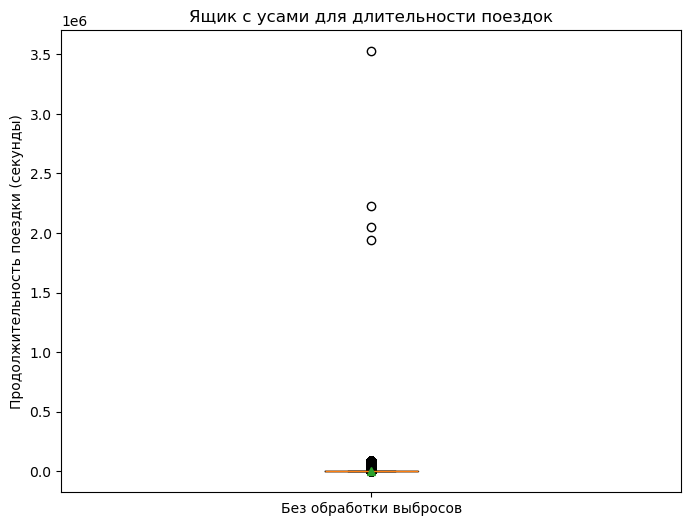

In [441]:
plt.figure(figsize = (8, 6))
plt.boxplot(train_data['trip_duration'], labels = ['Без обработки выбросов'], showmeans = True, showfliers = True)
plt.ylabel('Продолжительность поездки (секунды)')
plt.title('Ящик с усами для длительности поездок')
plt.show()

Видим, что выбросы есть. Они представлены в виде кружков.

Очистим данные от выбросов. **Использую метод IQR (межквартильный размах)**:

In [442]:
Q1 = train_data['trip_duration'].quantile(0.25)
Q3 = train_data['trip_duration'].quantile(0.75)
IQR = Q3 - Q1
print(IQR, Q1, Q3)

678.0 397.0 1075.0


Условия для фильтрации выбросов:

In [443]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

-620.0 2092.0


Фильтрация данных:

In [444]:
train_data = train_data[(train_data['trip_duration'] >= lower_bound) & (train_data['trip_duration'] <= upper_bound)]
print(f'Количество строк после очистки: {train_data.shape[0]}')

Количество строк после очистки: 969100


Количество строк уменьшилось, значит очистка прошла успешно. Убедимся в этом:

In [445]:
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2209155,2,2016-05-03 09:03:08,2016-05-03 09:17:12,2,-73.979813,40.752529,-73.982681,40.763680,N,844
1,id0586605,1,2016-01-01 16:40:51,2016-01-01 16:57:32,1,-73.977623,40.746296,-73.968414,40.788933,N,1001
2,id0467144,1,2016-04-24 13:57:03,2016-04-24 14:14:31,1,-73.950699,40.779404,-73.863129,40.768608,N,1048
3,id0989010,2,2016-01-10 17:03:47,2016-01-10 17:16:51,1,-73.984558,40.721802,-73.976753,40.752213,N,784
4,id0580742,1,2016-02-25 17:37:36,2016-02-25 17:49:48,1,-73.967720,40.768742,-73.977173,40.789875,N,732


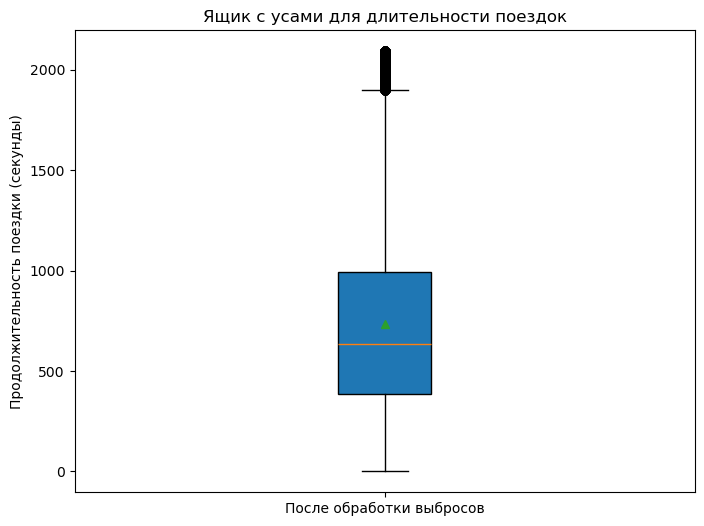

In [446]:
plt.figure(figsize = (8, 6))
plt.boxplot(train_data['trip_duration'], labels = ['После обработки выбросов'], showmeans = True, showfliers = True, patch_artist = True)
plt.ylabel('Продолжительность поездки (секунды)')
plt.title('Ящик с усами для длительности поездок')
plt.show()

Как видим, мы избавились от большинства выбросов. Выбросим остатки:

In [447]:
count1 = len(train_data[train_data['trip_duration'] >= 1800])
count2 = len(train_data['trip_duration'])
pr =  (count1 / count2) * 100

print(f"Процент count1 от count2: {pr:.2f}%")

Процент count1 от count2: 2.83%


Значит, выбросы можно просто удалить:

In [448]:
train_data = train_data[train_data['trip_duration'] < 1800]

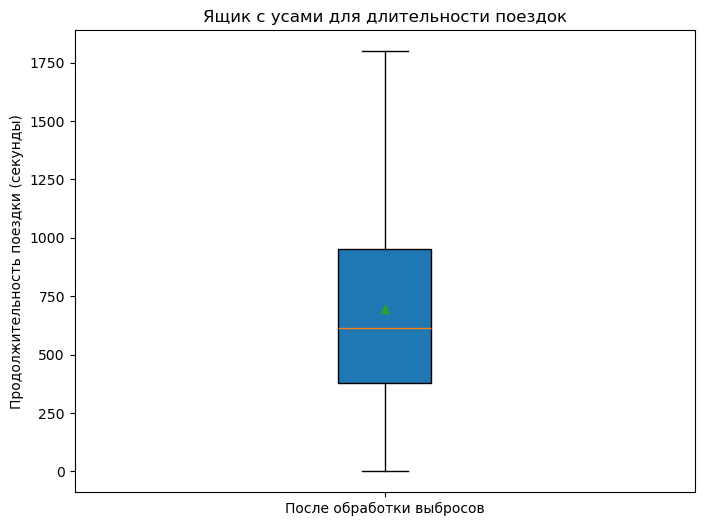

In [449]:
plt.figure(figsize = (8, 6))
plt.boxplot(train_data['trip_duration'], labels = ['После обработки выбросов'], showmeans = True, showfliers = True, patch_artist = True)
plt.ylabel('Продолжительность поездки (секунды)')
plt.title('Ящик с усами для длительности поездок')
plt.show()

Отлично! Выбросов больше нет.

### 3. Преобразование столбцов.

Посмотрим на некоторые другие графики:

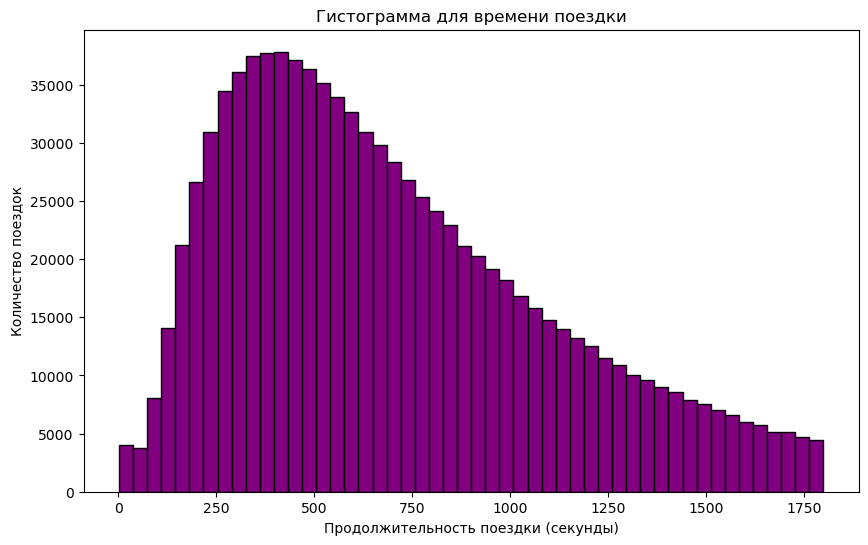

In [450]:
plt.figure(figsize = (10, 6))
plt.hist(train_data['trip_duration'], bins = 50, color = 'purple', edgecolor = 'black')
plt.xlabel('Продолжительность поездки (секунды)')
plt.ylabel('Количество поездок')
plt.title('Гистограмма для времени поездки')
plt.show()

Видим, что больше всего поездок совершается длительностью около 350 секунд (5.9 минут).

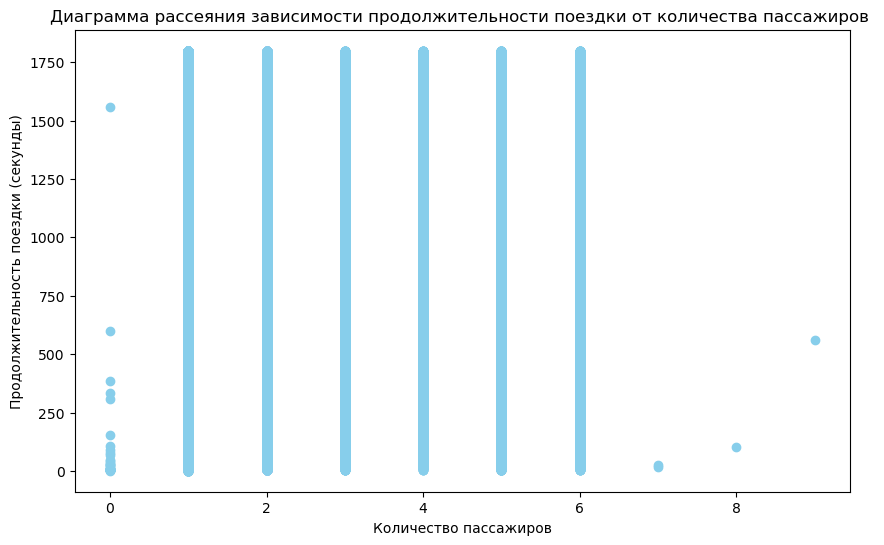

In [451]:
plt.figure(figsize = (10, 6))
plt.scatter(train_data['passenger_count'], train_data['trip_duration'],  color = 'skyblue')
plt.xlabel('Количество пассажиров')
plt.ylabel('Продолжительность поездки (секунды)')
plt.title('Диаграмма рассеяния зависимости продолжительности поездки от количества пассажиров ')
plt.show()

Видим, что число пассажиров варьируется от 0 до 9. Больше всего поездки совершаются с числом пассажиров от 1 до 6 человек. 

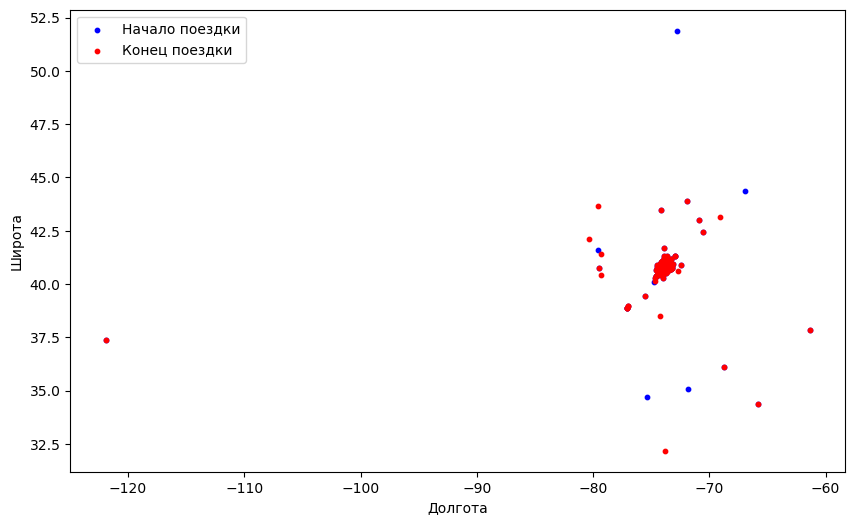

In [452]:
plt.figure(figsize = (10, 6))
plt.scatter(train_data["pickup_longitude"], train_data["pickup_latitude"], s = 10, c = 'blue', label = 'Начало поездки')
plt.scatter(train_data["dropoff_longitude"], train_data["dropoff_latitude"], s = 10, c = 'red', label = 'Конец поездки')

plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.legend()
plt.show()

Видим, что в основном поездки совершаются в пределах: от 32.5 до 45.0 широты и от -80 до -60 долготы. 

Теперь посмотрим на vendor_id:

In [453]:
unique_vendor_ids = train_data['vendor_id'].unique()

print(f"Количество уникальных vendor_id: {len(unique_vendor_ids)}")
print(f"Уникальные vendor_id: {unique_vendor_ids}")

Количество уникальных vendor_id: 2
Уникальные vendor_id: [2 1]


Значит, попробуем найти зависимость длительности поездки от vendor_id:

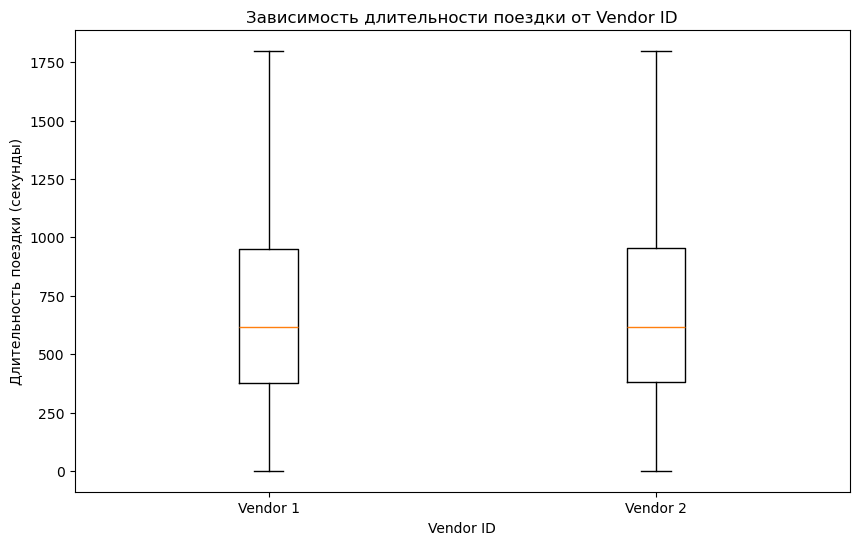

In [454]:
plt.figure(figsize = (10, 6))
plt.boxplot([train_data[train_data['vendor_id'] == 1]['trip_duration'],
       train_data[train_data['vendor_id'] == 2]['trip_duration']],
      labels=['Vendor 1', 'Vendor 2'])

plt.xlabel('Vendor ID')
plt.ylabel('Длительность поездки (секунды)')
plt.title('Зависимость длительности поездки от Vendor ID')
plt.show()

Так как из графика видно, что от агрегатора длительность поездки не зависит, то удалю из данных столбец vendor_id. Также удалю id, так как он также не влияет на длительность поездки:

In [455]:
train_data = train_data.drop(columns = ['id', 'vendor_id'])

Преобразую данные из столбцов pickup_datetime, dropoff_datetime в отдельные признаки:

In [456]:
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])
train_data['dropoff_datetime'] = pd.to_datetime(train_data['dropoff_datetime'])

Из pickup_datetime я возьму: год, месяц, день, час, минуты, секунды.

In [457]:
train_data['pickup_year'] = train_data['pickup_datetime'].dt.year
train_data['pickup_month'] = train_data['pickup_datetime'].dt.month
train_data['pickup_day'] = train_data['pickup_datetime'].dt.day
train_data['pickup_hour'] = train_data['pickup_datetime'].dt.hour
train_data['pickup_minute'] = train_data['pickup_datetime'].dt.minute
train_data['pickup_second'] = train_data['pickup_datetime'].dt.second

Проверим, какое количество разных годов встречается в данных:

In [458]:
unique_years = train_data['pickup_year'].nunique()
print(f"В столбце 'pickup_year' встречается {unique_years} уникальных годов.")

В столбце 'pickup_year' встречается 1 уникальных годов.


Значит, этот признак можем удалить, он не влияет на длительность поездки:

In [459]:
train_data = train_data.drop(columns = ['pickup_year'])

Из dropoff_datetime я возьму: час, минуты, секунды (так как мы выяснили, что год один, а месяц и день будут дублироваться в pickup_datetime).

In [460]:
train_data['dropoff_hour'] = train_data['dropoff_datetime'].dt.hour
train_data['dropoff_minute'] = train_data['dropoff_datetime'].dt.minute
train_data['dropoff_second'] = train_data['dropoff_datetime'].dt.second

Удаляю преобразованние столбцы:

In [461]:
train_data = train_data.drop(columns = ['pickup_datetime', 'dropoff_datetime'])

Посмотрим, как мы преобразовали данные:

In [462]:
train_data.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,dropoff_hour,dropoff_minute,dropoff_second
0,2,-73.979813,40.752529,-73.982681,40.763680,N,844,5,3,9,3,8,9,17,12
1,1,-73.977623,40.746296,-73.968414,40.788933,N,1001,1,1,16,40,51,16,57,32
2,1,-73.950699,40.779404,-73.863129,40.768608,N,1048,4,24,13,57,3,14,14,31
3,1,-73.984558,40.721802,-73.976753,40.752213,N,784,1,10,17,3,47,17,16,51
4,1,-73.967720,40.768742,-73.977173,40.789875,N,732,2,25,17,37,36,17,49,48


Также хочу проверить корреляцию между часом начала поездки и окончания:

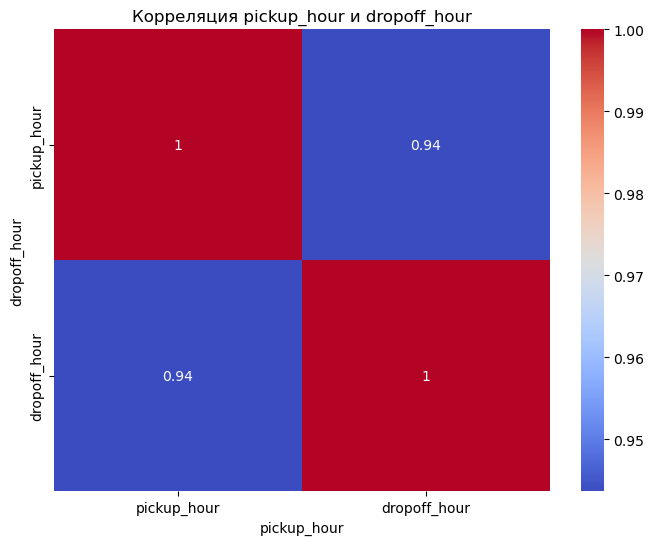

In [463]:
plt.figure(figsize = (8, 6))
sns.heatmap(train_data[['pickup_hour', 'dropoff_hour']].corr(), annot = True, cmap = 'coolwarm')

plt.xlabel('pickup_hour')
plt.ylabel('dropoff_hour')
plt.title('Корреляция pickup_hour и dropoff_hour')
plt.show()

Так как корреляция между признаками сильная, удалю один из них:

In [464]:
train_data = train_data.drop(columns = ['dropoff_hour'])

Также хочу убедиться в том, что pickup_minute, pickup_second, dropoff_minute, dropoff_second не влияют на длительность поездки:

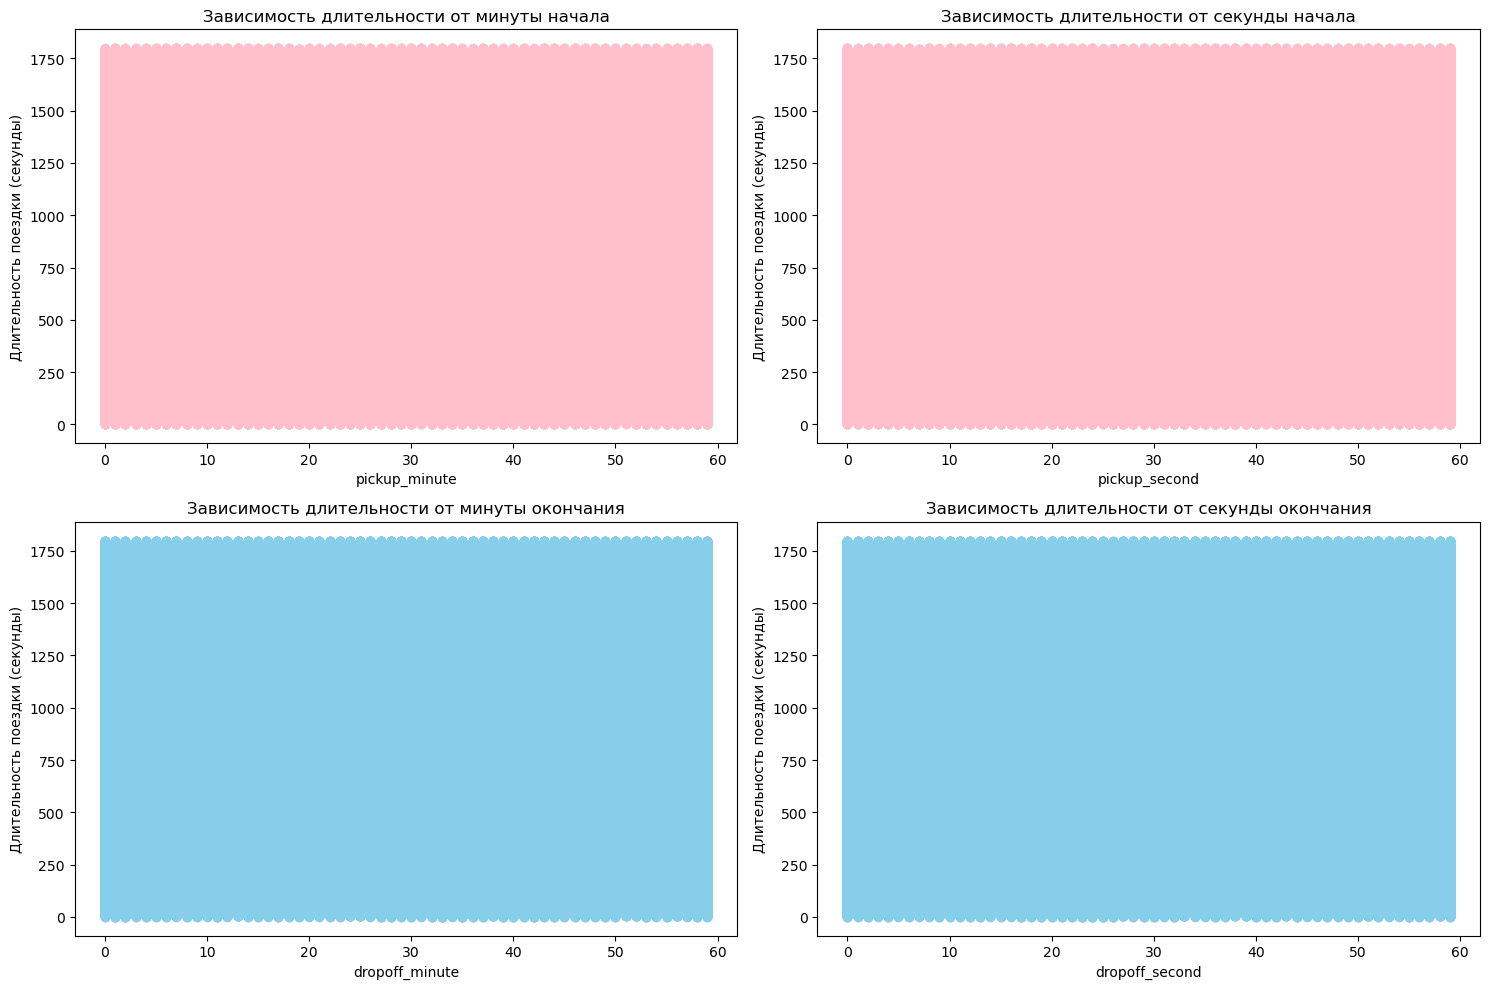

In [465]:
plt.figure(figsize = (15, 10)) 

plt.subplot(2, 2, 1)
plt.scatter(train_data['pickup_minute'], train_data['trip_duration'], color = 'pink')
plt.xlabel('pickup_minute')
plt.ylabel('Длительность поездки (секунды)')
plt.title('Зависимость длительности от минуты начала')

plt.subplot(2, 2, 2)
plt.scatter(train_data['pickup_second'], train_data['trip_duration'], color = 'pink')
plt.xlabel('pickup_second')
plt.ylabel('Длительность поездки (секунды)')
plt.title('Зависимость длительности от секунды начала')

plt.subplot(2, 2, 3)
plt.scatter(train_data['dropoff_minute'], train_data['trip_duration'], color = 'skyblue')
plt.xlabel('dropoff_minute')
plt.ylabel('Длительность поездки (секунды)')
plt.title('Зависимость длительности от минуты окончания')

plt.subplot(2, 2, 4)
plt.scatter(train_data['dropoff_second'], train_data['trip_duration'], color = 'skyblue')
plt.xlabel('dropoff_second')
plt.ylabel('Длительность поездки (секунды)')
plt.title('Зависимость длительности от секунды окончания')

plt.tight_layout()
plt.show()

Видим, что данные не несут нагрузки, удаляем их:

In [466]:
train_data = train_data.drop(columns = ['pickup_minute', 'pickup_second', 'dropoff_minute', 'dropoff_second'])

### 4. Работа с store_and_fwd_flag (категориальная переменная) .

Так как store_and_fwd_flag является категориальной переменной, принимающей значения 'N' и 'Y', то воспользуемся **Label Encoding** для кодирования:

In [467]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_data['store_and_fwd_flag_encoded'] = encoder.fit_transform(train_data['store_and_fwd_flag'])
print(f"Соответствие кодов и значений: {dict(zip(encoder.classes_, encoder.transform(encoder.classes_))) }")

Соответствие кодов и значений: {'N': 0, 'Y': 1}


Удаляем store_and_fwd_flag:

In [468]:
train_data = train_data.drop(columns = ['store_and_fwd_flag'])

In [469]:
train_data.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_hour,store_and_fwd_flag_encoded
0,2,-73.979813,40.752529,-73.982681,40.763680,844,5,3,9,0
1,1,-73.977623,40.746296,-73.968414,40.788933,1001,1,1,16,0
2,1,-73.950699,40.779404,-73.863129,40.768608,1048,4,24,13,0
3,1,-73.984558,40.721802,-73.976753,40.752213,784,1,10,17,0
4,1,-73.967720,40.768742,-73.977173,40.789875,732,2,25,17,0


Теперь попоробуем построить модель:

In [470]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = train_data[['passenger_count', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 
            'pickup_month', 'pickup_day', 'pickup_hour', 'store_and_fwd_flag_encoded']]
y = train_data['trip_duration']

In [471]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [472]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

In [473]:
from sklearn.metrics import mean_squared_error as mse
def rmse(y, pred):
    return np.sqrt(mse(y, pred))

In [474]:
rmse(y_test, y_pred)

400.91757353090503

In [475]:
mean_trip_duration = train_data['trip_duration'].mean()
print(f"Среднее значение длительности поездки: {mean_trip_duration:.2f}")

Среднее значение длительности поездки: 696.89


Как видим, результат не особо хороший. Попробуем поработать с координатами.

### 5. Работа с координатами.

Сначаса попробую использовать легкую **формулу Евклида** для подсчета расстояния:

In [476]:
def euclidean_distance(lon1, lat1, lon2, lat2):
    return np.sqrt((lon2 - lon1)**2 + (lat2 - lat1)**2)

train_data['distance'] = euclidean_distance(
    train_data['pickup_longitude'], 
    train_data['pickup_latitude'], 
    train_data['dropoff_longitude'], 
    train_data['dropoff_latitude']
  )

In [477]:
train_data_1 = train_data.drop(columns = ['dropoff_longitude', 'dropoff_latitude'])
train_data_1.head()

,passenger_count,pickup_longitude,pickup_latitude,trip_duration,pickup_month,pickup_day,pickup_hour,store_and_fwd_flag_encoded,distance
0,2,-73.979813,40.752529,844,5,3,9,0,0.011513
1,1,-73.977623,40.746296,1001,1,1,16,0,0.043620
2,1,-73.950699,40.779404,1048,4,24,13,0,0.088233
3,1,-73.984558,40.721802,784,1,10,17,0,0.031396
4,1,-73.967720,40.768742,732,2,25,17,0,0.023151


Построим новую модель:

In [478]:
X = train_data_1[['passenger_count', 'pickup_longitude', 'pickup_latitude', 'pickup_month', 'pickup_day', 'pickup_hour', 'store_and_fwd_flag_encoded', 'distance']]
y = train_data_1['trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)

rmse(y_test, y_pred)

317.89048653095034

Как видим, rmse уменьшился. Попробуем преобразовать координаты в расстояние более сложным методом, с использованием **формулы Гаверсинуса** : 

In [479]:
import math

def haversine_distance(lon1, lat1, lon2, lat2):
  R = 6371

  lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
  distance = R * c
  return distance

train_data['distance2'] = train_data.apply(
  lambda row: haversine_distance(
    row['pickup_longitude'],
    row['pickup_latitude'],
    row['dropoff_longitude'],
    row['dropoff_latitude']
  ),
  axis=1
)

In [480]:
train_data_2 = train_data.drop(columns = ['dropoff_longitude', 'dropoff_latitude', 'distance'])
train_data_2.head()

,passenger_count,pickup_longitude,pickup_latitude,trip_duration,pickup_month,pickup_day,pickup_hour,store_and_fwd_flag_encoded,distance2
0,2,-73.979813,40.752529,844,5,3,9,0,1.263187
1,1,-73.977623,40.746296,1001,1,1,16,0,4.804012
2,1,-73.950699,40.779404,1048,4,24,13,0,7.471088
3,1,-73.984558,40.721802,784,1,10,17,0,3.444869
4,1,-73.967720,40.768742,732,2,25,17,0,2.481063


In [484]:
X = train_data_2[['passenger_count', 'pickup_longitude', 'pickup_latitude', 'pickup_month', 'pickup_day', 'pickup_hour', 'store_and_fwd_flag_encoded', 'distance2']]
y = train_data_2['trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

model_3 = LinearRegression()
model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_test)

rmse(y_test, y_pred)

results_df = pd.DataFrame({
  'Prediction': y_pred,
  'Target': y_test
})

print(results_df)

         Prediction  Target
543411   617.143798     530
288095   704.860382     696
281448   638.582064     574
885472   564.311983     742
104858   599.558735     469
...             ...     ...
495480   610.905969     517
538436   797.847107     780
321486   698.064714     544
17794    657.950414     744
508118  1998.061783    1553

[188341 rows x 2 columns]


Итак, rmse получился меньше с использованием формулы Гаверсинуса, поэтому будем использовать именно этот метод преобразования координат в расстояние.

In [485]:
train_data = train_data.drop(columns = ['dropoff_longitude', 'dropoff_latitude', 'distance'])

In [486]:
train_data.rename(columns = {'distance2': 'distance'}, inplace = True)
train_data.head()

,passenger_count,pickup_longitude,pickup_latitude,trip_duration,pickup_month,pickup_day,pickup_hour,store_and_fwd_flag_encoded,distance
0,2,-73.979813,40.752529,844,5,3,9,0,1.263187
1,1,-73.977623,40.746296,1001,1,1,16,0,4.804012
2,1,-73.950699,40.779404,1048,4,24,13,0,7.471088
3,1,-73.984558,40.721802,784,1,10,17,0,3.444869
4,1,-73.967720,40.768742,732,2,25,17,0,2.481063


### 6. Работа с таргетом.

In [487]:
y = train_data['trip_duration']

Посмотрим на распределение таргета:

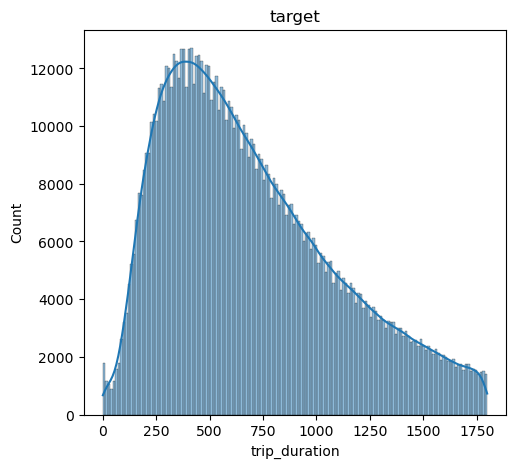

In [488]:
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.histplot(y, label = 'target', kde = True)
plt.title('target')
plt.show() 

Как видим, с распределением надо попробовать поработать, так как оно не является норальным.

Попробуем **логарифмическое преобразование** и **квадратный корень**:

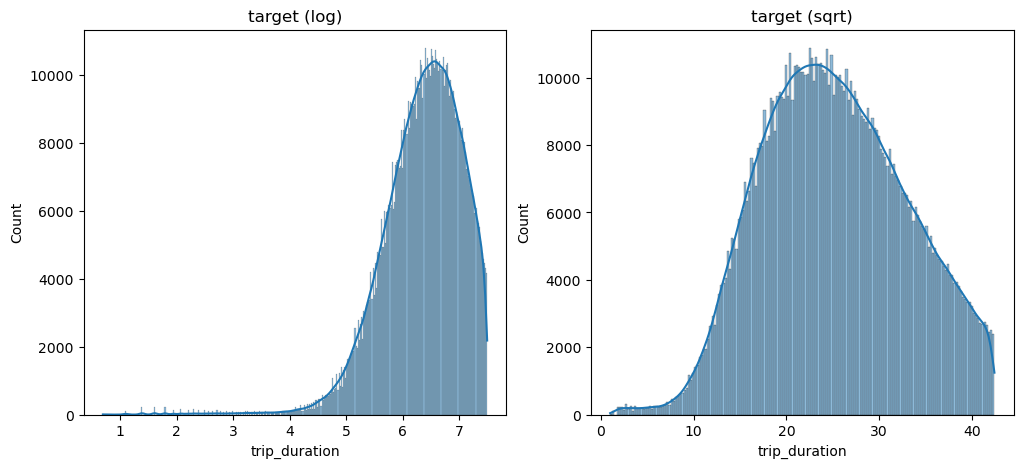

In [489]:
y_log = np.log1p(y)

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_log, label = 'target', kde = True)
plt.title('target (log)')

y_sqrt = np.sqrt(y)

plt.subplot(1, 2, 2)
sns.histplot(y_sqrt, label = 'target', kde = True)
plt.title('target (sqrt)')

plt.show()

Квадратный корень дал более хорошее распределение, поэтому попробуем применить его.

In [490]:
X = train_data[['passenger_count', 'pickup_longitude', 'pickup_latitude', 'pickup_month', 'pickup_day', 'pickup_hour', 'store_and_fwd_flag_encoded', 'distance']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

model_4 = LinearRegression()
model_4.fit(X_train, np.sqrt(y_train))
y_pred_sqrt = model_4.predict(X_test)
y_pred = np.square(y_pred_sqrt)

rmse(y_test, y_pred)

327.6977691740017

Как видим, rmse ухудшилось, значит эти изменения применять не будем.

### 7. Регуляризация.

Приводим признаки к одному масштабу с помощью **Z-нормализации**:

In [491]:
X = train_data[['passenger_count', 'pickup_longitude', 'pickup_latitude', 'pickup_month', 'pickup_day', 'pickup_hour', 'store_and_fwd_flag_encoded', 'distance']]
y = train_data['trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Используем **Ridge**:

In [492]:
from sklearn.linear_model import Ridge

model_5 = Ridge(
    alpha=4,
    fit_intercept=True,
    max_iter=100,
    tol=1e-4,
    solver='auto'
)

model_5.fit(X_train, y_train)
y_pred = model_5.predict(X_test)

rmse(y_test, y_pred)

317.0544263359737

Улучшение RMSE не последовало. Попробуем использовать **Lasso**:

In [493]:
from sklearn.linear_model import Lasso

model_6 = Lasso(
    alpha=0.1,
    fit_intercept=True,
    max_iter=100,
    tol=1e-4,
    precompute=True,
    warm_start=False,
    positive=False
)

model_6.fit(X_train, y_train)
y_pred = model_6.predict(X_test)

rmse(y_test, y_pred)

317.08260061052573

Аналогично. Используем **ElasticNet**:

In [494]:
from sklearn.linear_model import ElasticNet

model_7 = ElasticNet(
    alpha=0.001,
    l1_ratio=1.0,
    fit_intercept=True,
    max_iter=100,
    tol=1e-4,
    precompute=True,
    warm_start=False,
    positive=False
)

model_7.fit(X_train, y_train)
y_pred = model_7.predict(X_test)

rmse(y_test, y_pred)

317.05441922548596

В итоге, ни одна из регуляризаций не улучшили результат.

### 8. Работа с test.cvs и sample_submission.cvs

In [495]:
test_data = pd.read_csv('test.csv')

In [496]:
test_data = test_data.drop(columns = ['id', 'vendor_id'])

In [497]:
test_data['pickup_datetime'] = pd.to_datetime(test_data['pickup_datetime'])

In [498]:
test_data['pickup_month'] = test_data['pickup_datetime'].dt.month
test_data['pickup_day'] = test_data['pickup_datetime'].dt.day
test_data['pickup_hour'] = test_data['pickup_datetime'].dt.hour

In [499]:
test_data = test_data.drop(columns = ['pickup_datetime'])

In [500]:
encoder = LabelEncoder()
test_data['store_and_fwd_flag_encoded'] = encoder.fit_transform(test_data['store_and_fwd_flag'])

In [501]:
test_data = test_data.drop(columns = ['store_and_fwd_flag'])

In [502]:
import math

def haversine_distance(lon1, lat1, lon2, lat2):
  R = 6371

  lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
  distance = R * c
  return distance

test_data['distance2'] = test_data.apply(
  lambda row: haversine_distance(
    row['pickup_longitude'],
    row['pickup_latitude'],
    row['dropoff_longitude'],
    row['dropoff_latitude']
  ),
  axis=1
)

In [503]:
test_data = test_data.drop(columns = ['dropoff_longitude', 'dropoff_latitude'])

In [504]:
test_data.head()

,passenger_count,pickup_longitude,pickup_latitude,pickup_month,pickup_day,pickup_hour,store_and_fwd_flag_encoded,distance2
0,1,-73.985611,40.735943,6,8,7,0,2.763050
1,1,-73.978394,40.764351,4,3,12,0,1.959178
2,5,-73.989059,40.744389,6,5,2,0,1.404772
3,2,-73.990326,40.731136,5,5,17,0,1.978660
4,4,-73.789497,40.646675,5,12,17,0,20.837745


Все преобразования сделаны. Приступаем к работе с моделью.

In [505]:
submission = pd.read_csv('sample_submission.csv')

In [510]:
X = test_data[['passenger_count', 'pickup_longitude', 'pickup_latitude', 'pickup_month', 'pickup_day', 'pickup_hour', 'store_and_fwd_flag_encoded', 'distance2']]
y = submission['trip_duration']

y_pred = model_3.predict(X)

rmse(y, y_pred)

730.907760339793

In [509]:
submission_df = pd.DataFrame({'Id': submission['id'], 'trip_duration': y_pred}) 
submission_df.to_csv('submission.csv', index = False)